# Bias Specifications plot

This corresponds to figure 4 in the paper

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

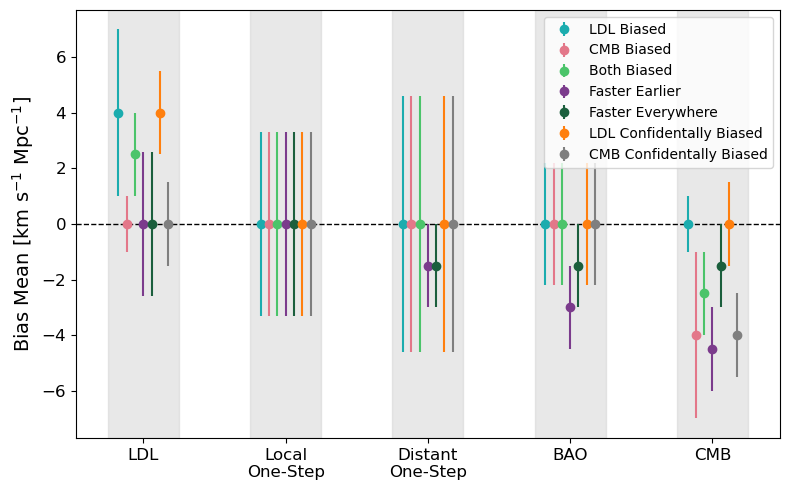

In [ ]:
# Define x-axis labels
x_labels = ['LDL', 'Local\nOne-Step', 'Distant\nOne-Step', 'BAO', 'CMB']
x = np.arange(len(x_labels))

# Define scenarios and their bias means and std. devs
scenarios = {
    'LDL Biased': {'means': [4, 0, 0, 0, 0], 'stds': [3, 3.3, 4.6, 2.2, 1]},
    'CMB Biased': {'means': [0, 0, 0, 0, -4], 'stds': [1, 3.3, 4.6, 2.2, 3]},
    'Both Biased': {'means': [2.5, 0, 0, 0, -2.5], 'stds': [1.5, 3.3, 4.6, 2.2, 1.5]},
    'Faster Earlier': {'means': [0, 0, -1.5, -3, -4.5], 'stds': [2.6, 3.3, 1.5, 1.5, 1.5]},
    'Faster Everywhere': {'means': [0, 0, -1.5, -1.5, -1.5], 'stds': [2.6, 3.3, 1.5, 1.5, 1.5]},
    'LDL Confidentally Biased': {'means': [4, 0, 0, 0, 0], 'stds': [1.5, 3.3, 4.6, 2.2, 1.5]},
    'CMB Confidentally Biased': {'means': [0, 0, 0, 0, -4], 'stds': [1.5, 3.3, 4.6, 2.2, 1.5]}
}

# Colors for each scenario
colors = ['#1bacae', '#e37789', '#4bc46a', '#7b3b8c', '#1b5f3d', '#ff7f0e', '#7f7f7f']

# Width to spread the points around each x-position
width = 0.05
n_scenarios = len(scenarios)
offsets = np.linspace(-width*n_scenarios/2, width*n_scenarios/2, n_scenarios)

plt.figure(figsize=(8,5))

for xi in x:
    plt.axvspan(xi - 0.25, xi + 0.25, color="lightgrey", alpha=0.5)

# Add horizontal dashed line at bias = 0
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Plot each scenario as points with error bars using the specified colors
for i, ((scenario, data), color) in enumerate(zip(scenarios.items(), colors)):
    plt.errorbar(x + offsets[i], data['means'], yerr=data['stds'], 
                 marker='o', linestyle='none', capsize=0, label=scenario,markersize=6, color=color)

plt.xticks(x, x_labels, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Bias Mean ' r'$[\mathrm{km}\ \mathrm{s}^{-1}\ \mathrm{Mpc}^{-1}]$', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('new_bias_specifications.pdf', bbox_inches="tight", dpi=300)
plt.show()


# H_0 measurement plot

This corresponds to figure 2 in the paper

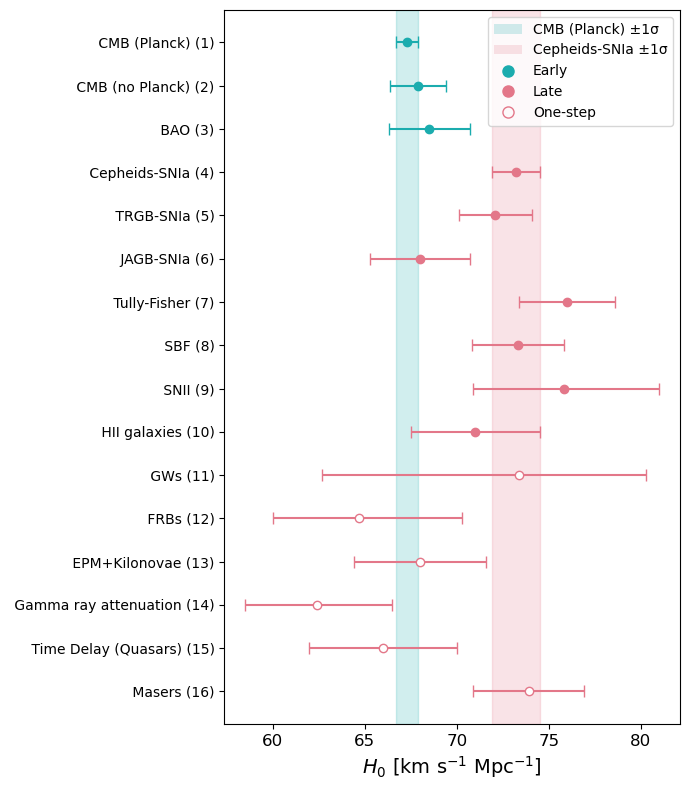

In [ ]:
# Data
measurements = [
    "CMB (Planck)", "CMB (no Planck)", "BAO",
    "Cepheids-SNIa", "TRGB-SNIa", "JAGB-SNIa",
    "Tully-Fisher", "SBF", "SNII", "HII galaxies",
    "GWs", "FRBs", "EPM+Kilonovae", "Gamma ray attenuation",
    "Time Delay (Quasars)", "Masers"
]

# H_0 measurements
H0 = np.array([67.3, 67.9, 68.5, 73.2, 72.1, 68.0, 76.0, 73.3, 75.8, 71.0, 73.4, 64.7, 68.0, 62.4, 66.0, 73.9])
lower_err = np.array([0.6, 1.5, 2.2, 1.3, 2.0, 2.7, 2.6, 2.5, 4.9, 3.5, 10.7, 4.7, 3.6, 3.9, 4.0, 3.0])
upper_err = np.array([0.6, 1.5, 2.2, 1.3, 2.0, 2.7, 2.6, 2.5, 5.2, 3.5, 6.9, 5.6, 3.6, 4.1, 4.0, 3.0])

# Categories: Early / Late
category = [
    "Early", "Early", "Early", 
    "Late", "Late", "Late", "Late", "Late", "Late", "Late",
    "One-step", "One-step", "One-step", "One-step", "One-step", "One-step"
]

colors = {"Early": '#1bacae', "Late": '#e37789', "One-step": "#e37789"}

# Plot
fig, ax = plt.subplots(figsize=(7, 8))  # reduced height

# Vertical positions
y = np.arange(len(measurements))

# CMB Planck: H0 = 67.3 ± 0.6
ax.axvspan(67.3 - 0.6, 67.3 + 0.6, color='#1bacae', alpha=0.2, label="CMB Planck ±1σ")

# Cepheids-SNIa: H0 = 73.2 ± 1.3
ax.axvspan(73.2 - 1.3, 73.2 + 1.3, color='#e37789', alpha=0.2, label="Cepheids-SNIa ±1σ")

# Plot each point with asymmetric horizontal error bars
for i in range(len(H0)):
    if category[i] == "One-step":
        # Hollow marker (unfilled circle)
        ax.errorbar(
            H0[i], y[i], 
            xerr=[[lower_err[i]], [upper_err[i]]], 
            fmt='o', markerfacecolor='white', color=colors["One-step"], 
            capsize=4
        )
    else:
        # Filled markers
        ax.errorbar(
            H0[i], y[i], 
            xerr=[[lower_err[i]], [upper_err[i]]], 
            fmt='o', color=colors[category[i]], capsize=4
        )

# Customise
plt.xticks(fontsize=12)
yticklabels = [f" {label} ({i+1})" for i, label in enumerate(measurements)]
ax.set_yticks(y)
ax.set_yticklabels(yticklabels)
ax.set_xlabel(r"$H_0$ $[\mathrm{km}\ \mathrm{s}^{-1}\ \mathrm{Mpc}^{-1}]$", fontsize=14)

# Customise Legend
legend_elements = [
    Patch(facecolor='#1bacae', alpha=0.2, label='CMB (Planck) ±1σ'),
    Patch(facecolor='#e37789', alpha=0.2, label='Cepheids-SNIa ±1σ'),
    Line2D([0], [0], marker='o', color='#1bacae', label='Early', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='o', color='#e37789', label='Late', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='o', color='#e37789', markerfacecolor='none', label='One-step', markersize=8, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper right')

# Invert y-axis so Early measurements appear at the top
ax.invert_yaxis()

plt.tight_layout()  
plt.savefig('H0_measurements.pdf', bbox_inches="tight", dpi=300)
plt.show()
